In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
#Analisando a quantidade de sentimentos
data.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa



*   Pré-processamento do texto



In [ ]:
import re

In [ ]:
#Limpeza do HTML
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

data.review = data.review.apply(clean)
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
#Remoção de caracteres especiais utilizando a função isalnum()
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

data.review = data.review.apply(is_special)
data.review[0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
def to_lower(text):
    return text.lower()

data.review = data.review.apply(to_lower)
data.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
import nltk
import pickle

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [w for w in words if w.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)  # Retorna uma string
data.review = data.review.apply(rem_stopwords)
data.review[0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street ski

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return ' '.join(lemmatized)
data.review = data.review.apply(lemmatize_text)
data.review[0]

'one reviewers mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death star dodgy dealings shady agreements never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audiences forget charm forget romance oz mess around first episode ever saw strike nasty surreal say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become c


* Criação do modelo



In [ ]:
import numpy as np

In [ ]:
X = np.array(data.iloc[:,0].values)
y = np.array(data.sentiment.values)
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(data.review).toarray()

In [ ]:
#Criando as variáveis de treinamento
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)

In [ ]:
#Realizando o treinamento do modelo de Naive Bayes
Naive_Bayes = MultinomialNB()
Naive_Bayes.fit(trainx,trainy)

MultinomialNB()

In [ ]:
#Realizando a predição
ynb = Naive_Bayes.predict(testx)

In [ ]:
#Avaliando o desempenho de predição do modelo
print(" A acurácia do modelo de Naive Bayes é: ", accuracy_score(testy, ynb))

 A acurácia do modelo de Naive Bayes é:  0.8335


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

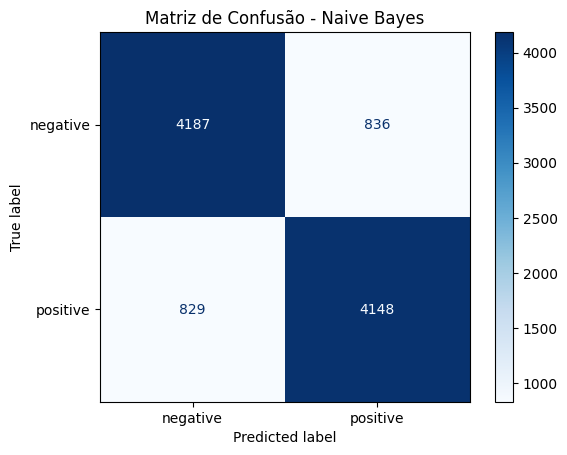

In [ ]:
#Gerando a matriz de confusão
cm = confusion_matrix(testy, ynb, labels=Naive_Bayes.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Naive_Bayes.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()

* Testando o funcionamento do modelo

In [ ]:
entrada = input("Digite a avaliação: ")

Digite a avaliaçãoterrible


In [ ]:
#Função para realizar o pre processamento da entrada
def preprocess(entrada):
    text = clean(entrada)
    text = is_special(entrada)
    text = to_lower(entrada)
    text = rem_stopwords(entrada)
    text = lemmatize_text(entrada)
    return entrada

entrada_processada = preprocess(entrada)

In [ ]:
#Realizando a vetorização da entrada pre processada
entrada_vetor= cv.transform([entrada_processada]).toarray()


In [ ]:
sentimento_pred = Naive_Bayes.predict(entrada_vetor)
print(f"Texto: {entrada}")
print(f"Sentimento Previsto: {sentimento_pred[0]}")

Texto: terrible
Sentimento Previsto: negative
